In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time

In [3]:
recording = mr.load_recordings('temporary_files_locationsrecordingsFake_probe.h5')
positions = recording.template_locations[:, 1:3]

In [4]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('temporary_files_locationsrecordingsFake_probe.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC in

In [5]:
job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M'}
benchmarks = []
for method in ['center_of_mass', 'monopolar_triangulation']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'v_origin']:
            title = f'CoM_{feature}'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            bench.run(method, params)
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        for do_decrease in [True, False]:
            if do_decrease:
                title = f'Monopolar with decrease_radius'
            else:
                title =  f'Monopolar without decrease_radius'
            params = {'enforce_decrease': do_decrease}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            bench.run(method, params)
            benchmarks.append(bench)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

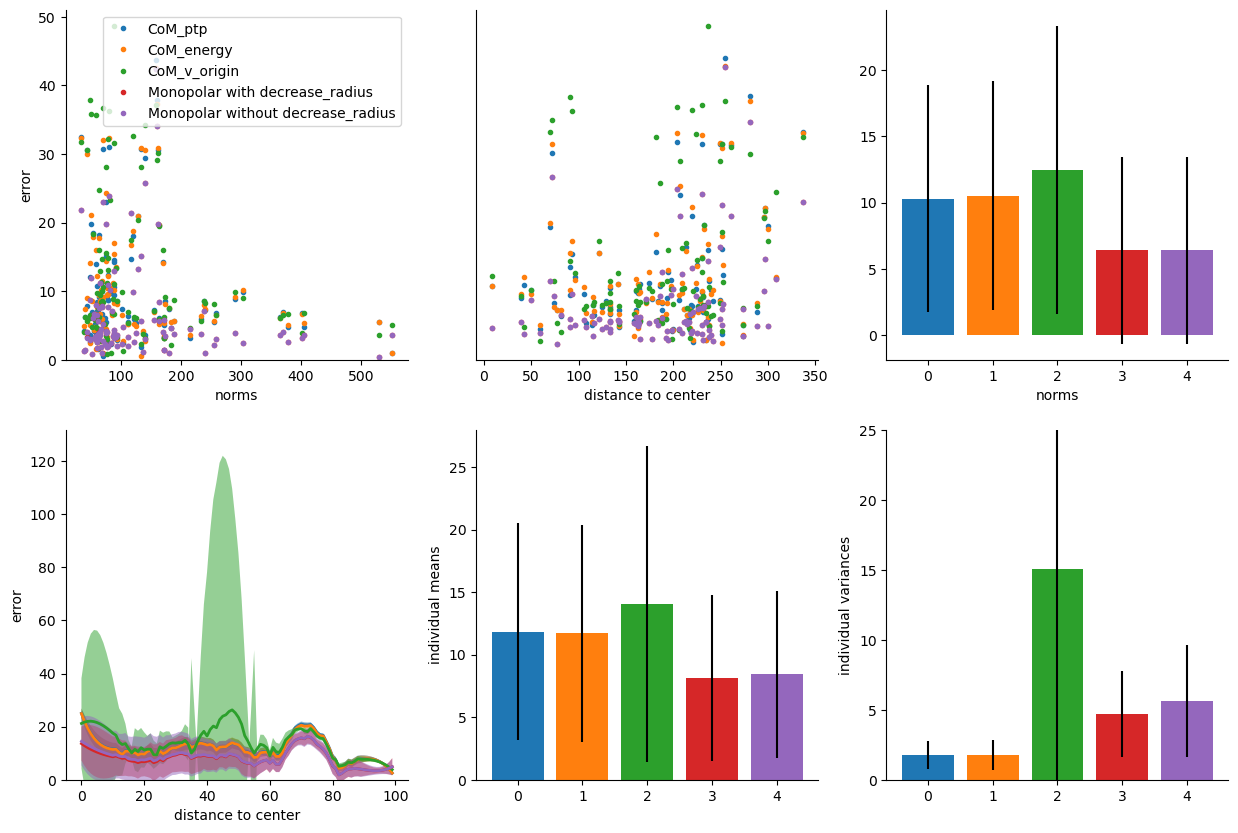

In [6]:
plot_comparison_positions(benchmarks)
import pylab as plt
plt.savefig('comparison.pdf')

In [7]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1

A Jupyter Widget

A Jupyter Widget

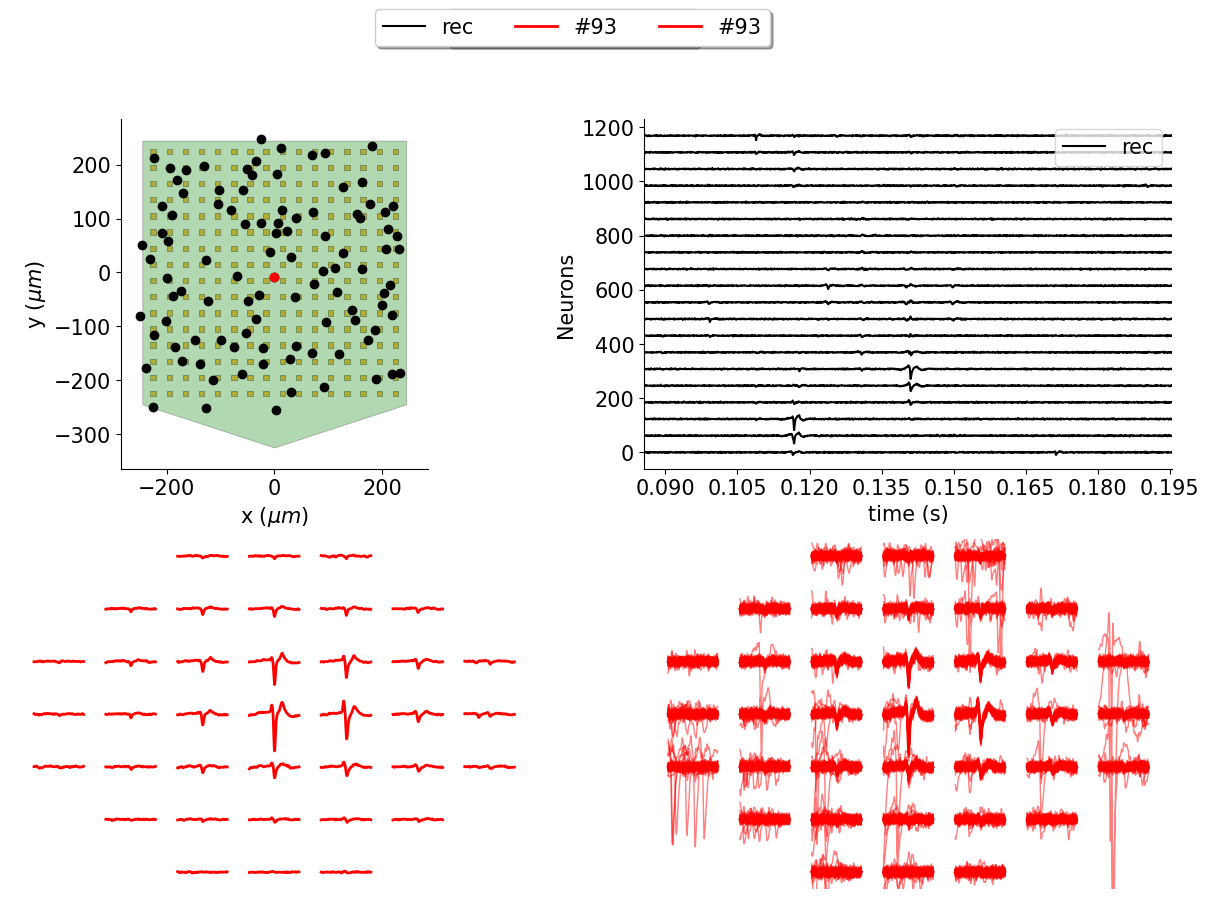

In [10]:
plot_figure_1(benchmarks[0])
import pylab as plt
plt.savefig('illustration.pdf')